In [218]:
# Import Packages
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [219]:
# Read an image
I = cv2.imread("1.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

I.dtype

dtype('uint8')

[]

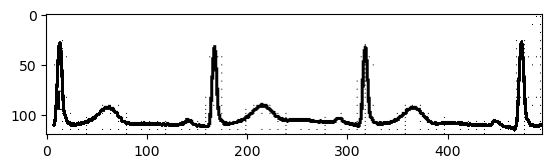

In [220]:
# Show image
plt.set_cmap("gray")
plt.imshow(I)
plt.plot()


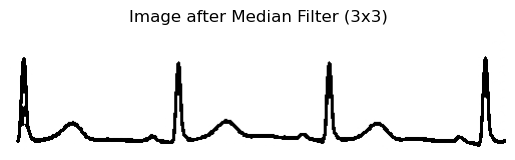

In [221]:
# Apply median filter
median = cv2.medianBlur(I, 3)

# Show the filtered image
plt.imshow(median, cmap='gray')
plt.title('Image after Median Filter (3x3)')
plt.axis('off')  # Hide axis ticks and labels
plt.show()

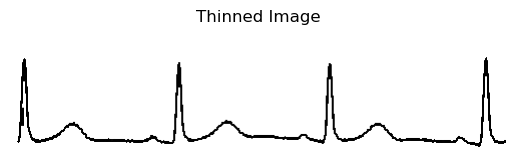

In [222]:
# Create a structuring element for erosion
kernel = np.ones((2, 2), np.uint8)

# Perform erosion to thin the lines
thinned_image = cv2.dilate(I, kernel, iterations=1)

# Show the thinned image
plt.imshow(thinned_image, cmap='gray')
plt.title('Thinned Image')
plt.axis('off')  # Hide axis ticks and labels
plt.show()


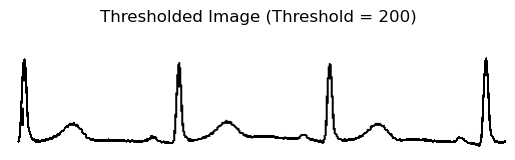

In [223]:
# Threshold the image
_, thresholded = cv2.threshold(thinned_image, 200, 255, cv2.THRESH_BINARY)

# Show the thresholded image
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image (Threshold = 200)')
plt.axis('off')  # Hide axis ticks and labels
plt.show()


In [224]:
# Define the height and width of the image
height = 120
width = 495

# Find the height of the first black pixel from bottom in each column
bottom_heights = []
top_heights = []

for col in range(width):
    column = thresholded[:, col]
    black_indices = np.where(column < 100)[0]
    
    # Find bottom height
    if len(black_indices) > 0:
        bottom_height = height - np.min(black_indices)
    else:
        bottom_height = 0
    bottom_heights.append(bottom_height)
    
    # Find top height
    if len(black_indices) > 0:
        top_height = np.max(black_indices)
    else:
        top_height = height
    top_heights.append(top_height)

# Convert lists to NumPy arrays
bottom_heights = np.array(bottom_heights)
top_heights = np.array(top_heights)

# Calculate the difference between the total height and top heights
diff_heights = height - top_heights

# Calculate mean_heights
mean_heights = np.empty(len(bottom_heights))
mean_heights[:20] = bottom_heights[:20]  # Assign bottom_heights directly for the first 20 elements to remove the noise(vertical line)
mean_heights[20:] = (bottom_heights[20:] + diff_heights[20:]) / 2  # Calculate mean for the rest

In [225]:
# Smooth the mean heights by taking the mean of three consecutive elements
smoothed_heights = np.convolve(mean_heights, np.ones(3) / 3, mode='valid')


In [226]:
# Save mean heights as a NumPy file
np.save('signal1.npy',smoothed_heights)

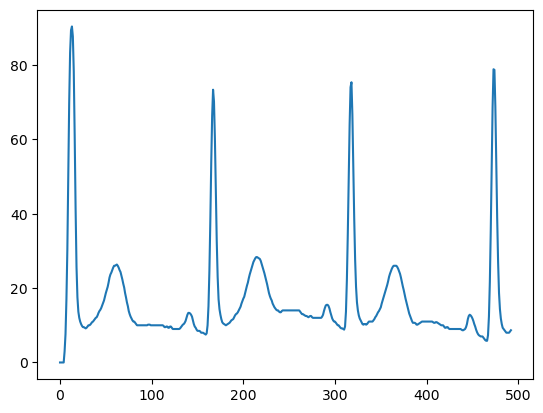

In [227]:
signal = numpy.load("signal1.npy")
matplotlib.pyplot.plot(signal)